# Analysis of Gender Disparity in the Middle East
### By Eric Sirinian
#### Sources: data.un.gov

As our cultures and societies have evolved and progressed over the centuries, it is common knowledge that women are starting to see more equality over all aspects of life.  Whether it be in certain jobs being more accessible or even the opportunity to receive some kind of education.  However, it is clear that all areas in the world progress at different rates; hence the concepts of a first, second, and third world country.  What I will analyze is the changes in education and labor force in the Middle East from 2000 - 2005 to garner a better understanding of the progression in that area.

The Middle East, as defined by Wikipedia, consists of Afghanistan, Bahrain, Cyprus, Egypt, Iran, Iraq, Israel, Jordan, Kuwait, Lebanon, Oman, Qatar, Saudi Arabia, Syria, Turkey, United Arab Emirates, and Yemen.  It is in these countries where I will analyze through various graphics and statistics these questions:
- Are women and men with equivalent educations occupying an equal part in the labor forces?
- Does literacy percentages correctly correspond with enrollment in tertiary education, or is only a small?
- Do levels of overall literacy reflect increase in tertiary enrollment? Or, does increase in tertiary enrollment reflect growth in literacy?

To being answering these questions, there are several steps to be taken that will help gain a base understanding of the situation at hand.

First, a valid data source is necessary.  For this analyzation, data taken from data.un.org, again, specifically focusing on the geneder statistics in the Middle East

In [69]:
# Import of necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
# Reading in the data
females = pd.DataFrame()
males = pd.DataFrame()

female_lit = pd.DataFrame()
male_lit = pd.DataFrame()

# Countries considered to be apart of the middle east by Wikipedia
middle_east = ['Afghanistan','Bahrain','Cyprus','Egypt','Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Oman', 
               'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']
# Scope
years = ['2000','2001','2002','2003','2004','2005']

# Read in all tertiary data from file, taking Country, Gender, Year, and Value
df = pd.DataFrame(pd.read_csv('UN_Tertiary_Data.csv', encoding='latin1', usecols=['Country or Area', 'Subgroup','Year','Value']))
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Take read in data and find values for FEMALES in the Middle East from 2000-2005 if present
females = df.loc[(df['Country or Area'].isin(middle_east)) & 
                 (df['Subgroup'] == 'Female') & 
                 (df['Year'].isin(years))]

# Take read in data and find values for MALES in the Middle East from 2000-2005 if present
males = df.loc[(df['Country or Area'].isin(middle_east)) & 
               (df['Subgroup'] == 'Male') & 
               (df['Year'].isin(years))]

# # Read in data of FEMALE share of tertiary enrollment
# df = pd.DataFrame(pd.read_csv('UN_Women_Share_Tertiary.csv', encoding='latin1', usecols=['Country or Area','Year','Value']))
# female_share = df.loc[(df['Country or Area'].isin(middle_east)) & 
#                       (df['Year'].isin(years))]

# Read in Adult Literacy Data (Percentages)
df = pd.DataFrame(pd.read_csv('UN_Adult_Literacy.csv', encoding='latin1', usecols=['Country or Area','Subgroup','Year','Value']))
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

## Female Adult Literacy
female_lit = df.loc[(df['Country or Area'].isin(middle_east)) & 
                    (df['Subgroup'] == 'Female 15+ yr') & 
                    (df['Year'].isin(years))]

## Male Adult Literacy
male_lit = df.loc[(df['Country or Area'].isin(middle_east)) &
                  (df['Subgroup'] == 'Male 15+ yr') &
                  (df['Year'].isin(years))]

# Read in Adult Employment to Population Data (Percentages)
df = pd.DataFrame(pd.read_csv('UN_Employment.csv', encoding='latin1', usecols=['Country or Area','Subgroup','Year','Value']))
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

## Female Employment
female_emp = df.loc[(df['Country or Area'].isin(middle_east)) & 
                    (df['Subgroup'] == 'Female 15+ yr') & 
                    (df['Year'].isin(years))]

## Male Employment
male_emp = df.loc[(df['Country or Area'].isin(middle_east)) & 
                    (df['Subgroup'] == 'Male 15+ yr') & 
                    (df['Year'].isin(years))]

In [71]:
### FINDING MALE AND FEMALE AVERAGE ATTENDANCE OVER TIME PERIOD
avgs = []

for c in females['Country or Area']:
    country = females.loc[females['Country or Area'] == c]
    avgs.append(country['Value'].mean())

female_avgs = pd.DataFrame({'Country or Area': females['Country or Area'], 'Averages': avgs})
avgs = []

for c in males['Country or Area']:
    country = males.loc[males['Country or Area'] == c]
    avgs.append(country['Value'].mean())
    
male_avgs = pd.DataFrame({'Country or Area': males['Country or Area'], 'Averages': avgs})

female_avgs = female_avgs.drop_duplicates()
male_avgs = male_avgs.drop_duplicates()

In [72]:
### FIND PERCENT CHANGE FEMALE OVER MALE

change_f = []
change_m = []

for c in females['Country or Area']:
    if c in middle_east:
        country = females.loc[females["Country or Area"] == c]
        last_val = country.iloc[0]['Value']
        first_val = country.iloc[len(country['Country or Area']) - 1]['Value']
        change_f.append((last_val - first_val) / last_val * 100)

for c in males['Country or Area']:
    if c in middle_east:
        country = males.loc[males["Country or Area"] == c]
        last_val = country.iloc[0]['Value']
        first_val = country.iloc[len(country['Country or Area']) - 1]['Value']
        change_m.append((last_val - first_val) / last_val * 100)

    

percent_change_f = pd.DataFrame({'Country': females['Country or Area'], 'Change': change_f})
percent_change_m = pd.DataFrame({'Country': males['Country or Area'], 'Change': change_m})

percent_change_f = percent_change_f.drop_duplicates()
percent_change_m = percent_change_m.drop_duplicates()

In [73]:
## Constant values for following bar graphs
index = np.arange(0,15)
bar_width = 0.4
opacity = 0.8

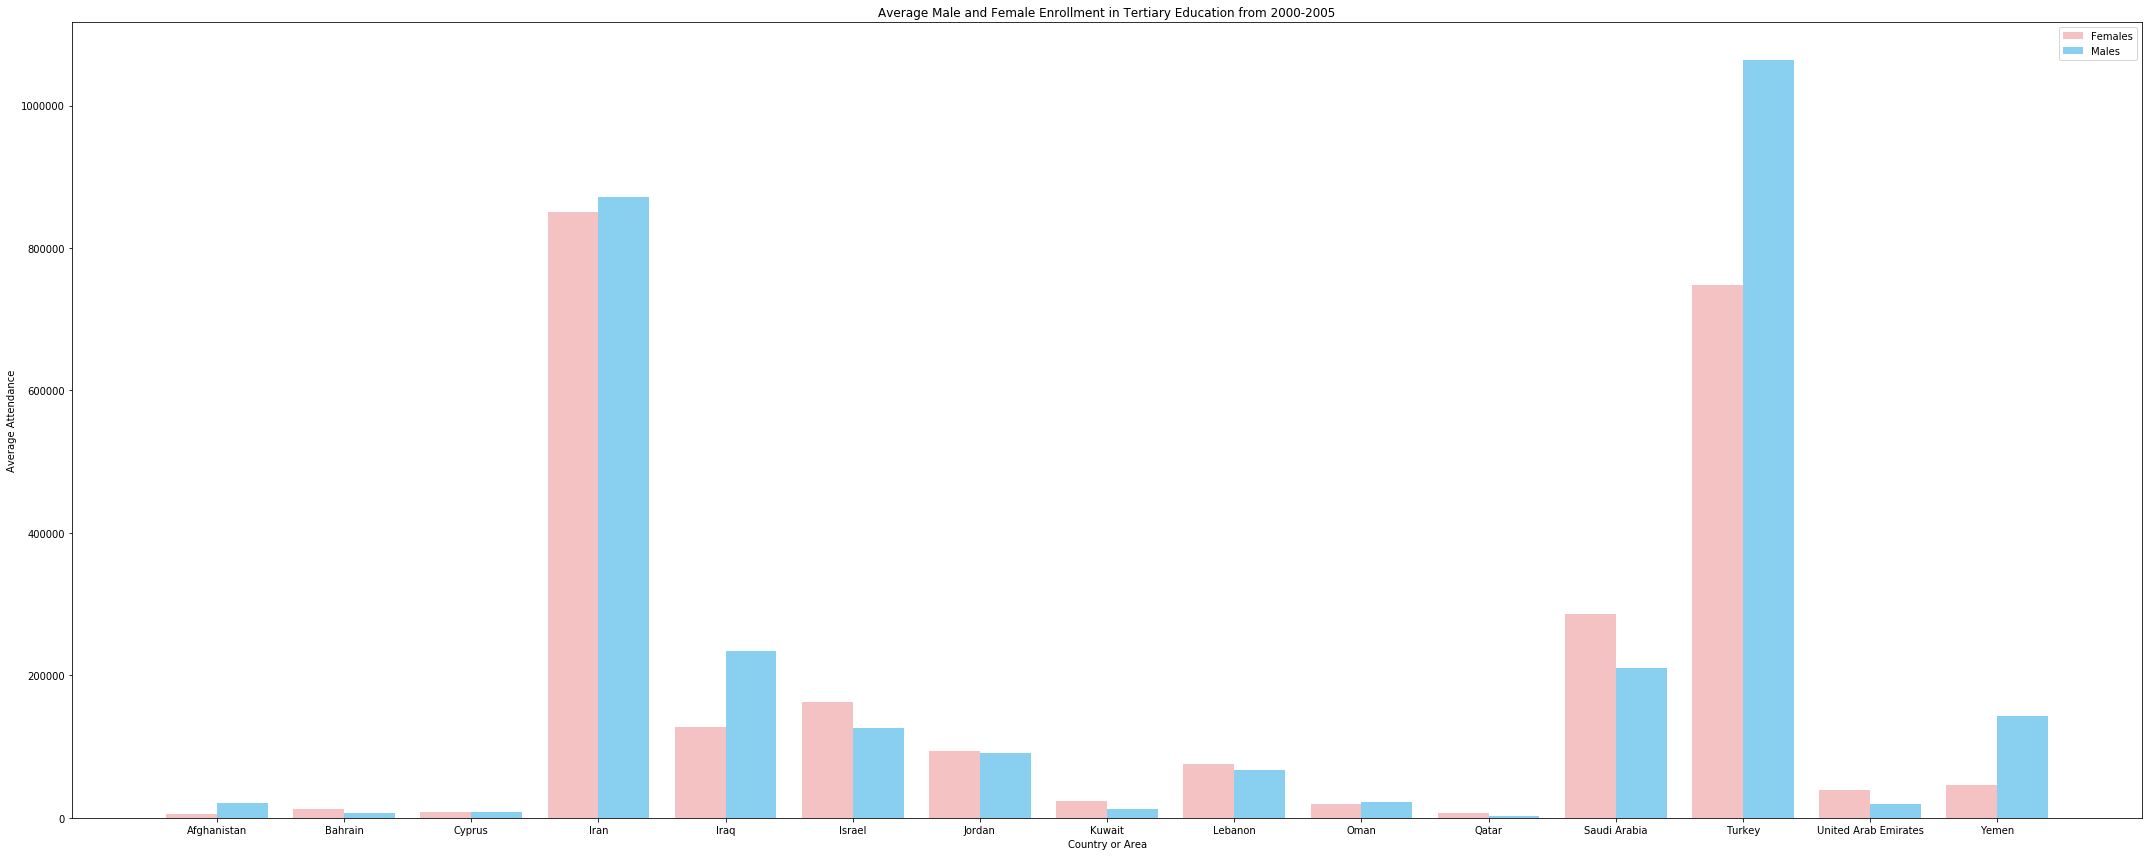

In [74]:
plt.figure(figsize=(30,12))

plt.bar(index, female_avgs['Averages'], bar_width,
        color='#F4C2C2',
        label='Females')

plt.bar(index+bar_width, male_avgs['Averages'], bar_width,
        color='#89cff0',
        label='Males')

plt.xticks(index + (bar_width/2), male_avgs['Country or Area'])
plt.title("Average Male and Female Enrollment in Tertiary Education from 2000-2005")
plt.ylabel("Average Attendance")
plt.xlabel("Country or Area")
plt.legend()
plt.tight_layout()
plt.show()

This first graphic depicts the average male and female tertiary enrollment in the Middle East.  It is clear that there are more males than females enrolled in tertiary education but, looking at the graphic as a whole, the averages are fairly equivalent.  The following graphic depicts the percent change in the enrollment between 2000 and 2005.  In most countries, there is a trend of strong growth which is indicitive that more females are enrolling in tertiary education each year.

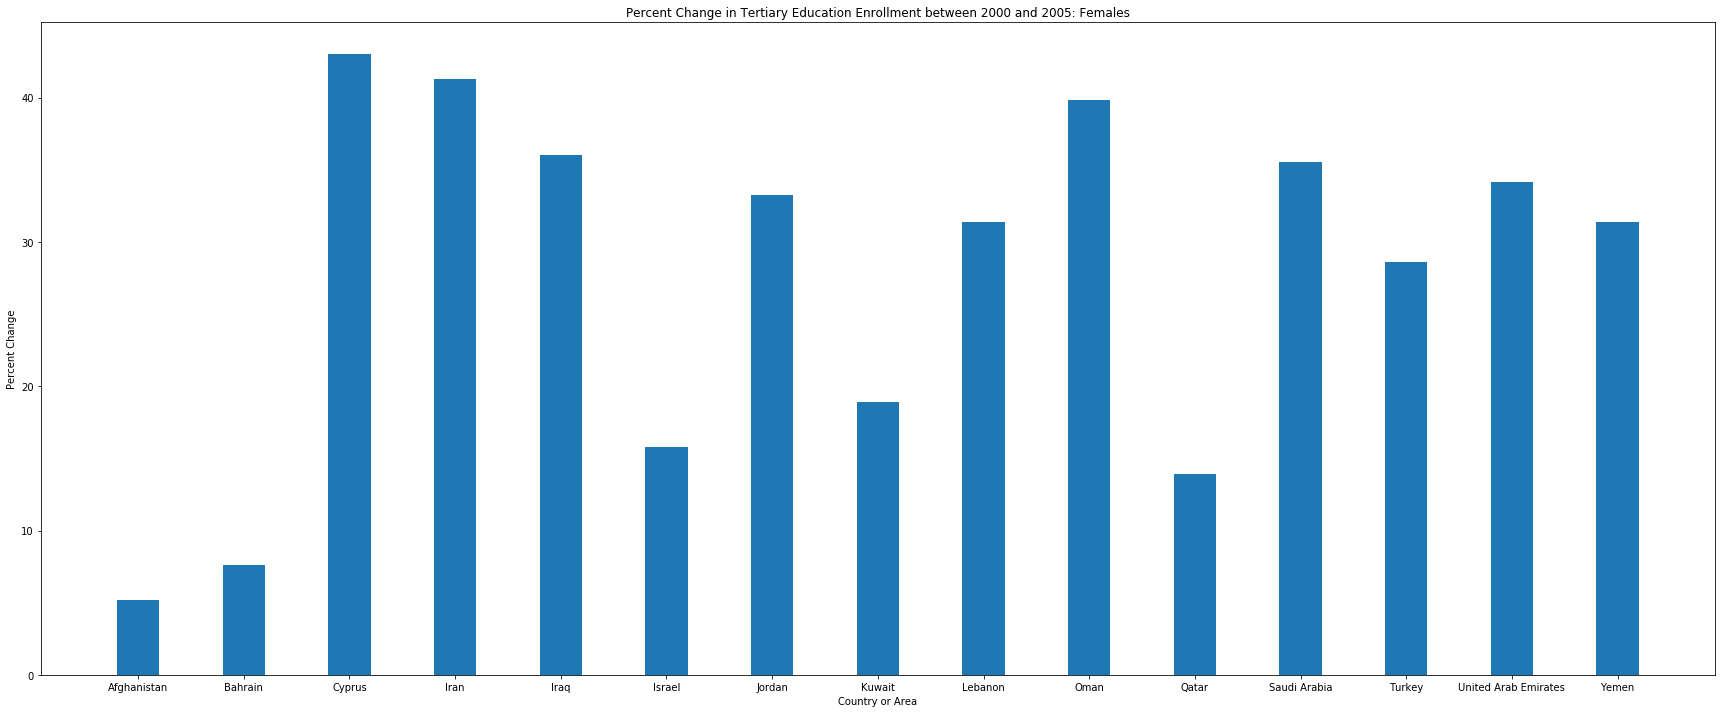

In [75]:
plt.figure(figsize=(30,12))

plt.bar(index, percent_change_f['Change'], bar_width)

plt.xticks(index, percent_change_f['Country'])
plt.title("Percent Change in Tertiary Education Enrollment between 2000 and 2005: Females")
plt.ylabel("Percent Change")
plt.xlabel("Country or Area")
plt.show()

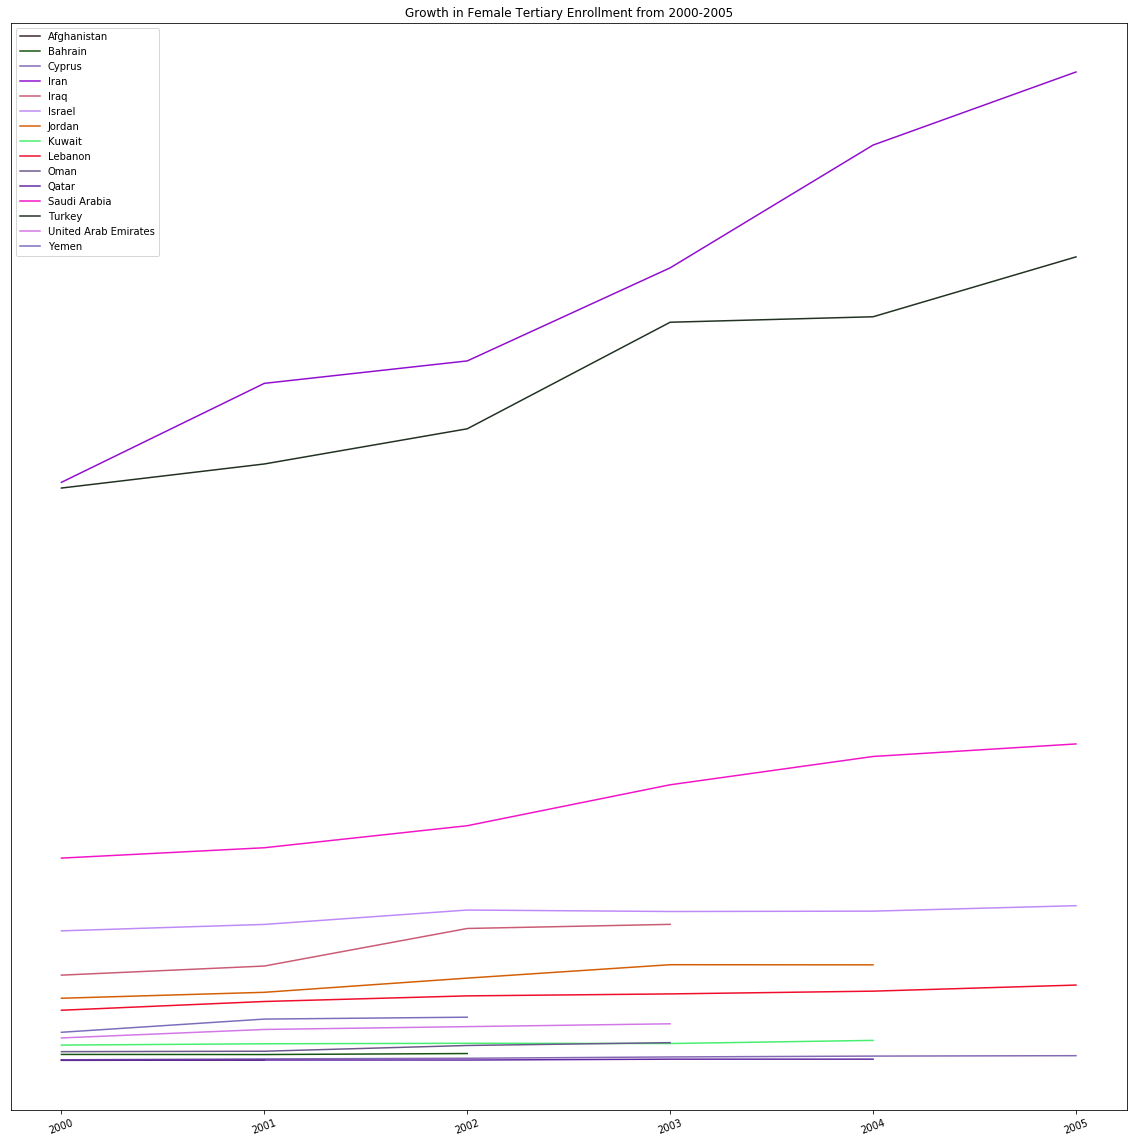

In [76]:
### MAPPING GROWTH 

# Enrollment
plt.figure(figsize=(20,20))
data = pd.DataFrame()
middle_east_temp = middle_east
growth = []
for c in females['Country or Area']:
    if c in middle_east_temp:
        data = females.loc[females['Country or Area'] == c]
        for v in data['Value']:
            growth.insert(0,v)
        plt.plot(growth, label=c, color=np.random.rand(3,))
        plt.legend()
        middle_east_temp.remove(c)
        growth = []

plt.title("Growth in Female Tertiary Enrollment from 2000-2005")
plt.xticks(np.arange(6), ['2000','2001','2002','2003','2004','2005'],rotation=20)
plt.yticks([])
plt.show()

This graphic above, labeled "Growth in Female Tertiary Enrollment from 2000-2005", further suggests that growth exists in female tertiary education enrollment.  There are standout countries, such as Iran and Turkey, where there is rapid growth.

In [77]:
### FINDING MALE AND FEMALE AVERAGE EMPLOYMENT OVER TIME PERIOD
emp_avgs = []

for c in female_emp['Country or Area']:
    country = female_emp.loc[female_emp['Country or Area'] == c]
    emp_avgs.append(country['Value'].mean())

female_emp_avgs = pd.DataFrame({'Country or Area': female_emp['Country or Area'], 'Averages': emp_avgs})
emp_avgs = []

for c in male_emp['Country or Area']:
    country = male_emp.loc[male_emp['Country or Area'] == c]
    emp_avgs.append(country['Value'].mean())
    
male_emp_avgs = pd.DataFrame({'Country or Area': male_emp['Country or Area'], 'Averages': emp_avgs})

female_emp_avgs = female_emp_avgs.drop_duplicates()
male_emp_avgs = male_emp_avgs.drop_duplicates()

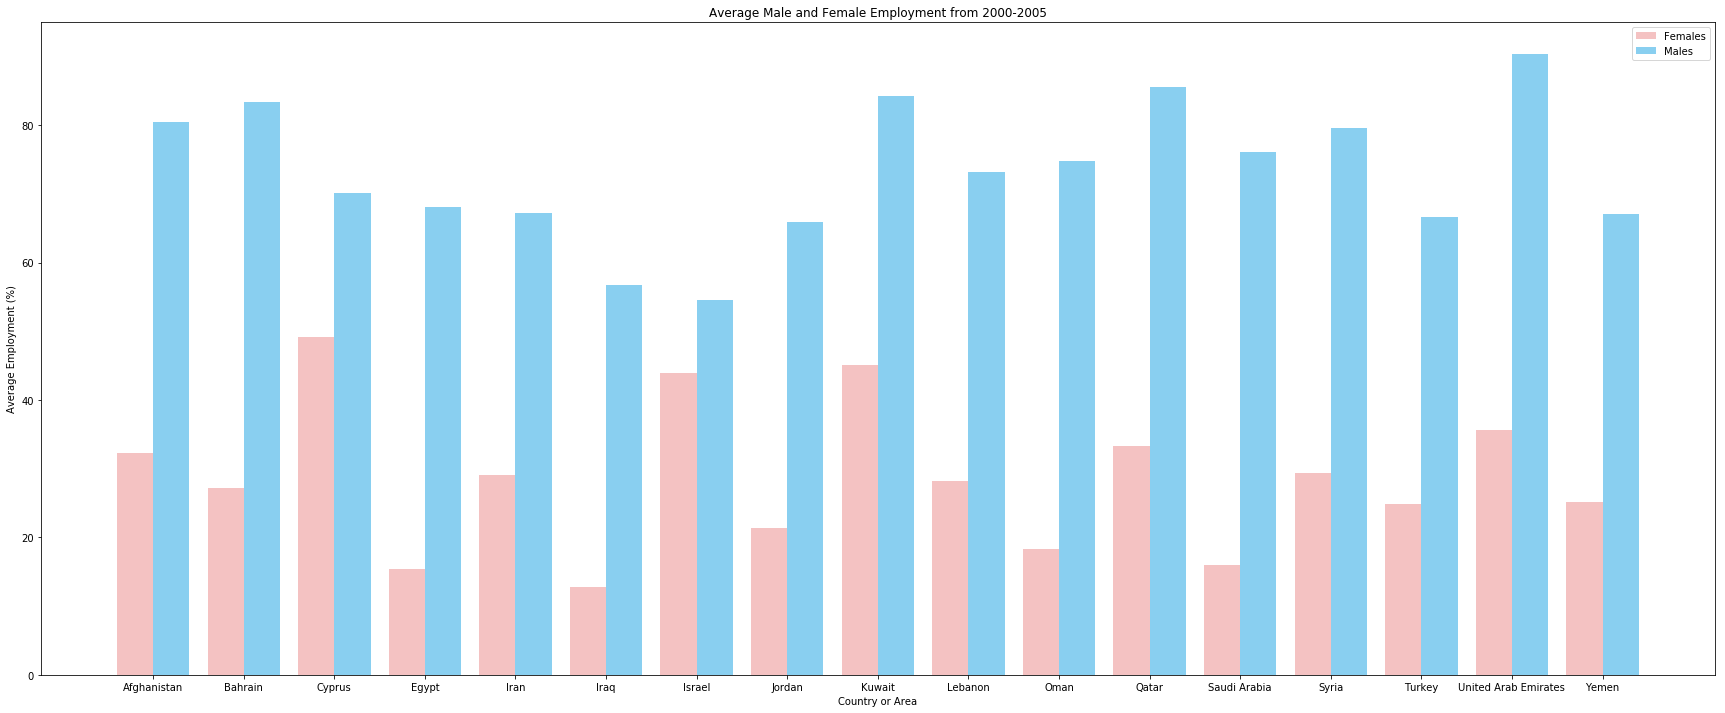

In [78]:
emp_index = np.arange(0,17)

plt.figure(figsize=(30,12))

plt.bar(emp_index, female_emp_avgs['Averages'], bar_width,
        color='#F4C2C2',
        label='Females')

plt.bar(emp_index+bar_width, male_emp_avgs['Averages'], bar_width,
        color='#89cff0',
        label='Males')

plt.xticks(emp_index + (bar_width/2), male_emp_avgs['Country or Area'])
plt.title("Average Male and Female Employment from 2000-2005")
plt.ylabel("Average Employment (%)")
plt.xlabel("Country or Area")
plt.legend()
plt.show()

Keeping the data and change depictions in tertiary enrollment, the graphic above depicts the average male and female share of the labor force in the Middle East from 2000-2005.  Clearly there is a discrepancy where, on average, males are occupying more of the labor force than females even when, on average, their share of enrollment in tertiary education are near identical.  In all, while there is a form of progress in the realm of education, there is still a vast disparity in the realm of labor.  As this data is not necessarily recent, it definitely hinders a proper conclusion.  However, that is not to say there there is a trend present.  If educational trends are showing consistent signs of growth, it would only be natural for labor force trends to follow, otherwise, it would be unnecessary for so many individuals to attend upper level schooling. 

Now, in order to determine levels of literacy, it is first important to define what literacy is in the scope of this analyzation.  To be literate can refer to the basic skill of being able to read and write, being fluent in a given field or expertise, or it could even refer to being able to read and write at a higher level.  In this analyzation, with the given data, literacy refers to the basic skill to read and write.  While this opens a large scope of the population to this data, it is expected that the individuals who have received a tertiary education should strongly bolster this statistic. 

In [79]:
### FINDING MALE AND FEMALE AVERAGE LITERACY OVER TIME PERIOD
lit_avgs = []

for c in female_lit['Country or Area']:
    country = female_lit.loc[female_lit['Country or Area'] == c]
    lit_avgs.append(country['Value'].mean())

female_lit_avgs = pd.DataFrame({'Country or Area': female_lit['Country or Area'], 'Averages': lit_avgs})
lit_avgs = []

for c in male_lit['Country or Area']:
    country = male_lit.loc[male_lit['Country or Area'] == c]
    lit_avgs.append(country['Value'].mean())
    
male_lit_avgs = pd.DataFrame({'Country or Area': male_lit['Country or Area'], 'Averages': lit_avgs})

female_lit_avgs = female_lit_avgs.drop_duplicates()
male_lit_avgs = male_lit_avgs.drop_duplicates()

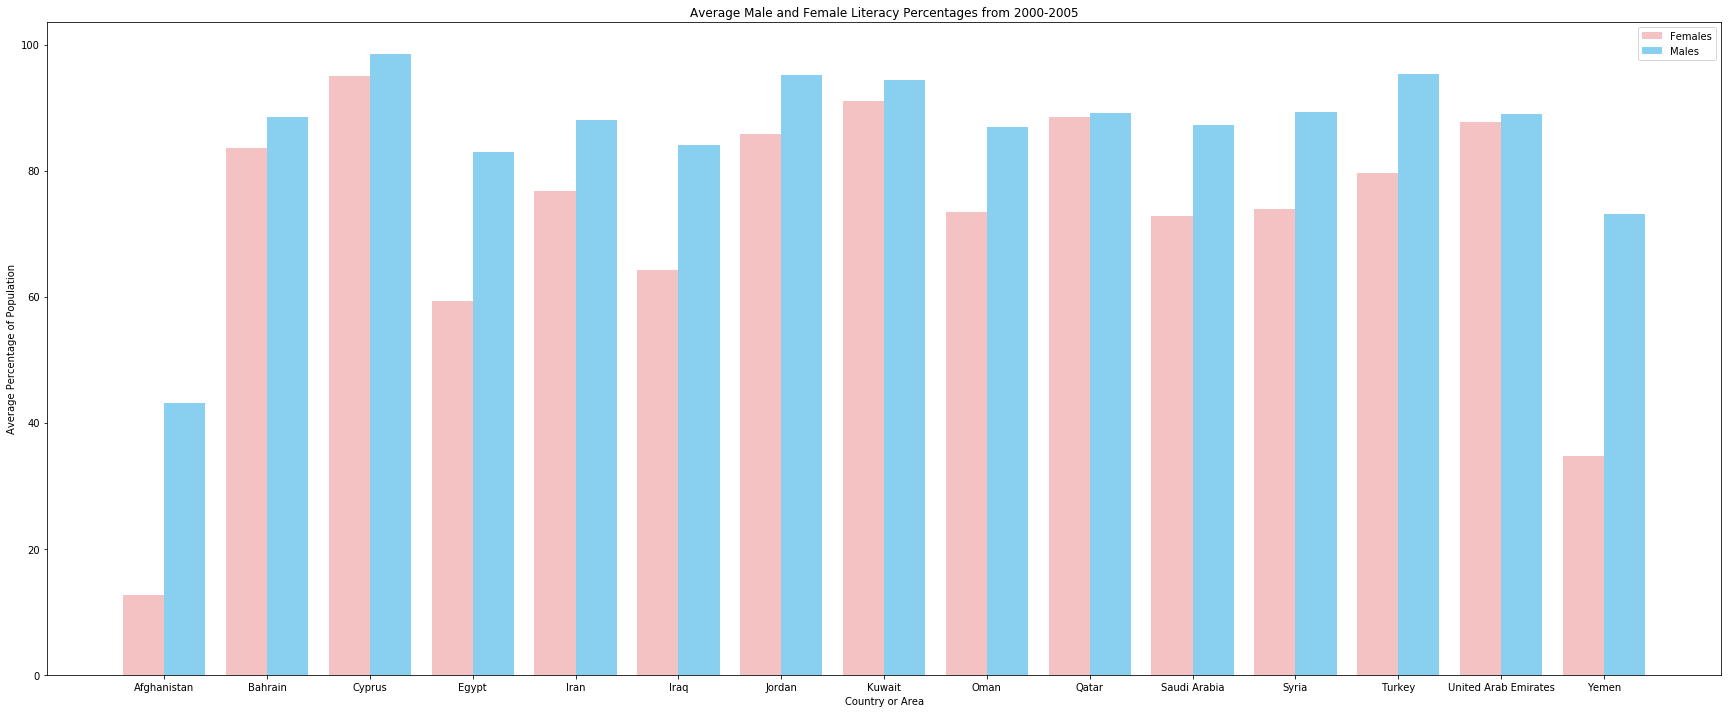

In [80]:
lit_index = np.arange(0,15)

plt.figure(figsize=(30,12))

plt.bar(lit_index, female_lit_avgs['Averages'], bar_width,
        color='#F4C2C2',
        label='Females')

plt.bar(lit_index+bar_width, male_lit_avgs['Averages'], bar_width,
        color='#89cff0',
        label='Males')

plt.xticks(lit_index + (bar_width/2), male_lit_avgs['Country or Area'])
plt.title("Average Male and Female Literacy Percentages from 2000-2005")
plt.ylabel("Average Percentage of Population")
plt.xlabel("Country or Area")
plt.legend()
plt.show()

Now, looking at the graphics depicting the average male and female enrollment in tertiary education and the average male and female literacy percentages in the Middle East from 2000 - 2005, it is evident that those recieving a tertiary education are, in fact, not strongly blostering these statistics.  However, as defined early, the use of the basic definition of “literacy” opens up a wide scope of individuals to this data.  Therefore, the discrepancies presented here could be attributed to this wide scope.  Therefore, based on this data, it can be said that as a whole, each country’s literacy percentages do correctly correspond with enrollment in tertiary education.  It is also important to note that literacy percentages, for the most part, are relativley equal, or at the very least, correspondent to enrollment in tertiary education averages.  Therefore, this could further bolster the claim that enrollment in tertiary education  is continuing to grow and thus is bringing the country closer to the likes of a more modern country.

Finally, the final question: "Do levels of overall literacy reflect increase in tertiary enrollment? Or, does increase in tertiary enrollment reflect growth in literacy?" can be answered in multiple ways.  On one hand, looking at the data presented, it seems that the increase in tertiary enrollment would provide more of an effect on literacy.  Due to the growing enrollment, it would be thought that there would be an overall increase in literacy because with more education, individuals would be aware to the fact that literacy is a key stepping stone in a countries progression in to the modern world.  On the other hand, since literacy was taken as a basic ability to read and write in this analysis, which would be acquired at younger ages, it might be the case that having these skills at younger ages would push individuals to remain in the educational system.  Going further, if taken that literacy affects tertiary enrollment, it could be determined that it also affects placement in the labor force.

All in all, it apparent that the entirety of each countries society (in terms of literacy, education, and labor force) is growing, regardless of pace.  Despite the fact that this data is not recent, it is coming from a trusted source and therefore, in conjunction with this analysis, can help provide a better base understanding of the changes occuring in Middle Eastern countries between genders in the fields of literacy, teritary education, and labor force share.  In addition to its age, it is important to note that this data was not entirely robust as there were instances of missing data.  Nevertheless, while it has its pitfalls, this report provides a coherent analysis in the scope and availibilty of the data to provide proper conclusions to the posed quesitons.